In [14]:
import matplotlib.pyplot as plt
import numpy as np

import pyxdf

In [15]:
WPI_xdf_path = "../HCILab1-Group3.xdf"
CSL_xdf_path = "../CSL_08_10.xdf"

### View XDF Streams

In [16]:
def view_xdf_streams(xdf_path):
    data, header = pyxdf.load_xdf(xdf_path)
    print(header)

    for stream in data:
        stream_name = stream["info"]["name"][0]
        stream_id = stream["info"]["stream_id"]
        stream_srate = stream["info"]["effective_srate"]
        
        print(f'Stream {stream_name} (Stream ID: {stream_id} with sampling rate {stream_srate})')

In [17]:
view_xdf_streams(WPI_xdf_path)

Stream 3: Calculated effective sampling rate 15.2534 Hz is different from specified rate 30.0000 Hz.


{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2024-10-08T09:44:17-0400']})}
Stream OBS_HCILab1 (Stream ID: 5 with sampling rate 30.000000267031854)
Stream Unicorn_HCILab1 (Stream ID: 4 with sampling rate 250.00947442827896)
Stream Unicorn_HCILab2 (Stream ID: 6 with sampling rate 244.83447853683415)
Stream OBS_HCILab2 (Stream ID: 3 with sampling rate 15.253360567994573)
Stream Unicorn_CSL_LabPC (Stream ID: 1 with sampling rate 249.9958149756105)
Stream OBS_CSL_LabPC (Stream ID: 7 with sampling rate 60.000247890807906)
Stream OBS_CSL_Laptop (Stream ID: 2 with sampling rate 29.99983389911107)


In [18]:
view_xdf_streams(CSL_xdf_path)

Stream 7: Calculated effective sampling rate -0.5664 Hz is different from specified rate 30.0000 Hz.
Stream 8: Calculated effective sampling rate -45.3639 Hz is different from specified rate 250.0000 Hz.
Stream 4: Calculated effective sampling rate -43.3404 Hz is different from specified rate 250.0000 Hz.
Stream 6: Calculated effective sampling rate -0.1575 Hz is different from specified rate 30.0000 Hz.


{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2024-10-08T15:45:03+0200']})}
Stream OBS_CSL_Laptop (Stream ID: 1 with sampling rate 30.000000271420504)
Stream Unicorn_CSL_Laptop (Stream ID: 5 with sampling rate 250.27171079816014)
Stream Unicorn_CSL_LabPC (Stream ID: 3 with sampling rate 249.99881213008948)
Stream OBS_CSL_LabPC (Stream ID: 2 with sampling rate 60.00058130920444)
Stream OBS_HCILab1 (Stream ID: 7 with sampling rate -0.566433592359699)
Stream Unicorn_HCILab1 (Stream ID: 8 with sampling rate -45.3638615875756)
Stream Unicorn_HCILab2 (Stream ID: 4 with sampling rate -43.340426984197165)
Stream OBS_HCILab2 (Stream ID: 6 with sampling rate -0.15745863117869738)


WPI HCI Lab Streams:


Stream 3: Calculated effective sampling rate 15.2534 Hz is different from specified rate 30.0000 Hz.


Stream OBS_HCILab1 has 129238 time stamps, starting with 3462.45867950733
Stream OBS_HCILab1 with time series (UNIX) begins with 1728395057.448
Stream Unicorn_HCILab1 has 1077105 time stamps, starting with 3462.017625534818


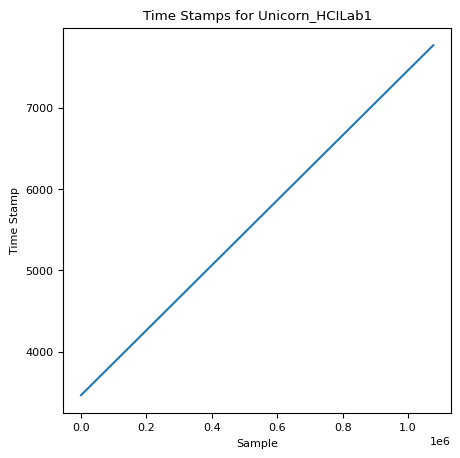

Stream Unicorn_HCILab2 has 1016073 time stamps, starting with 3448.975096914815


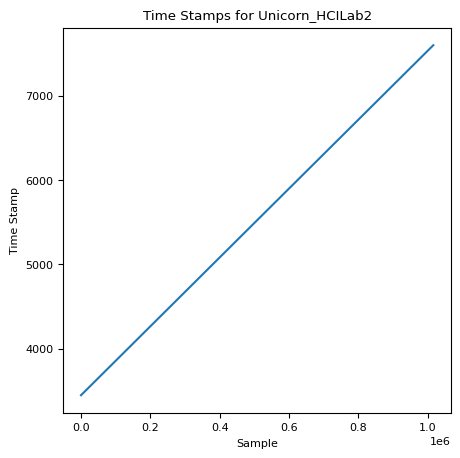

Stream OBS_HCILab2 has 66925 time stamps, starting with 3281.9091616267597
Stream OBS_HCILab2 with time series (UNIX) begins with 1728395082.141
Stream Unicorn_CSL_LabPC has 1052029 time stamps, starting with 3463.273707990593


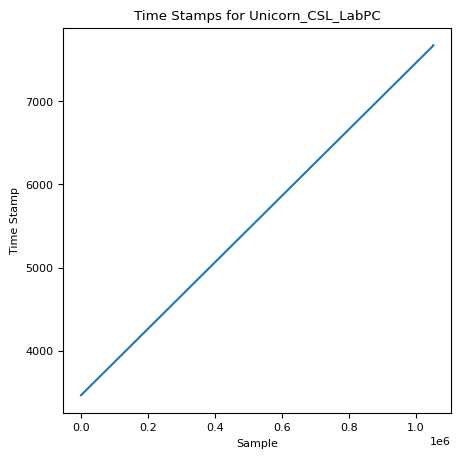

Stream OBS_CSL_LabPC has 258465 time stamps, starting with 3462.5905788998753
Stream OBS_CSL_LabPC with time series (UNIX) begins with 1728395057.879
Stream OBS_CSL_Laptop has 129231 time stamps, starting with 3462.6118905693484
Stream OBS_CSL_Laptop with time series (UNIX) begins with 1728395057.844

CSL Lab Streams:


Stream 7: Calculated effective sampling rate -0.5664 Hz is different from specified rate 30.0000 Hz.
Stream 8: Calculated effective sampling rate -45.3639 Hz is different from specified rate 250.0000 Hz.
Stream 4: Calculated effective sampling rate -43.3404 Hz is different from specified rate 250.0000 Hz.
Stream 6: Calculated effective sampling rate -0.1575 Hz is different from specified rate 30.0000 Hz.


Stream OBS_CSL_Laptop has 122908 time stamps, starting with 5462073.263246952
Stream OBS_CSL_Laptop with time series (UNIX) begins with 1728395103.777
Stream Unicorn_CSL_Laptop has 1025374 time stamps, starting with 5462073.039969902


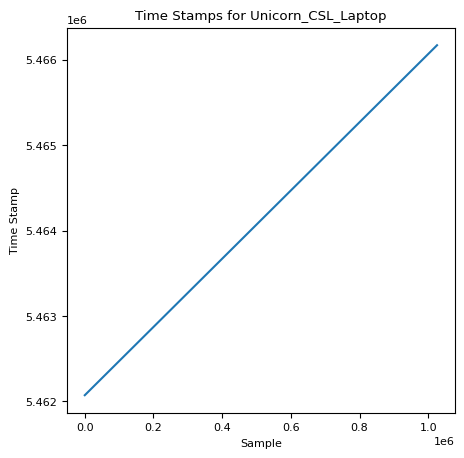

Stream Unicorn_CSL_LabPC has 1024097 time stamps, starting with 5462073.988585566


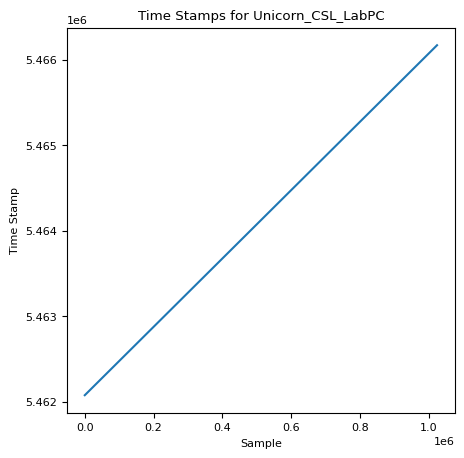

Stream OBS_CSL_LabPC has 245819 time stamps, starting with 5462073.258144875
Stream OBS_CSL_LabPC with time series (UNIX) begins with 1728395103.829
Stream OBS_HCILab1 has 122903 time stamps, starting with 151130.02930157402
Stream OBS_HCILab1 with time series (UNIX) begins with 1728395103.681
Stream Unicorn_HCILab1 has 1024285 time stamps, starting with 21295.941935109928


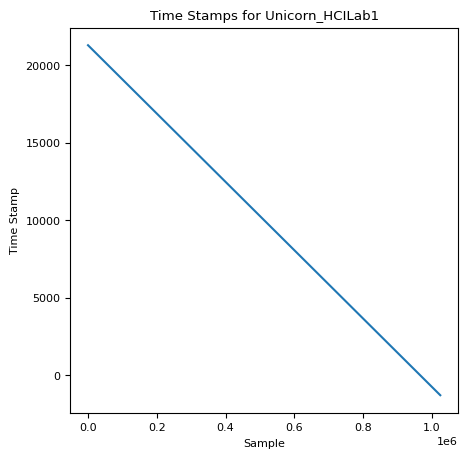

Stream Unicorn_HCILab2 has 1002458 time stamps, starting with 21320.94742942157


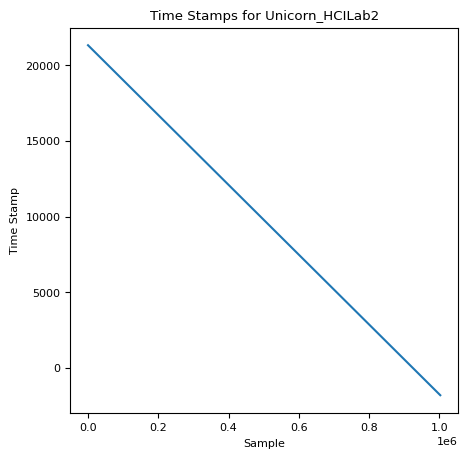

Stream OBS_HCILab2 has 64844 time stamps, starting with 281281.69681863254
Stream OBS_HCILab2 with time series (UNIX) begins with 1728395128.407


In [19]:
def examine_timestamps_length(xdf_path):
    data, header = pyxdf.load_xdf(xdf_path)
    
    for stream in data:
        stream_name = stream["info"]["name"][0]
        
        time_stamps = stream["time_stamps"]
        
        print(f'Stream {stream_name} has {len(time_stamps)} time stamps, starting with {time_stamps[0]}')
        
        time_series = stream["time_series"]
        if stream_name.startswith("OBS"):
            print(f"Stream {stream_name} with time series (UNIX) begins with {time_series[0][0]}")
        
        if "Unicorn" in stream_name:
            # plot the time stamps
            plt.rc('font', size=8)
            plt.figure(figsize=(5, 5))
            plt.plot(time_stamps)
            plt.xlabel('Sample')
            plt.ylabel('Time Stamp')
            plt.title(f"Time Stamps for {stream_name}")
            plt.show()

# Examine the length of all time stamps in each stream for both XDF files
print("WPI HCI Lab Streams:")
examine_timestamps_length(WPI_xdf_path)

print("\nCSL Lab Streams:")
examine_timestamps_length(CSL_xdf_path)

### Sync Streams!!

In [20]:
def sync_streams(data_streams_1, data_streams_2):
    
    """
    Sync the data by trimming time_stamp and time_series streams so that all EEG and Unicorn Streams begin at the same time
    
    Parameters:
    - data_streams_1: Stream data from WPI HCI Lab xdf file
    - data_streams_2: Stream data from CSL Lab xdf file
    """
    
    # Holds the 8 streams (4 OBS and 4 Unicorn)
    streams = {}
    
    # Create mappings of the 8 stream names to streams
    for stream in data_streams_1:
        stream_name = stream["info"]["name"][0]
        
        if stream_name in ["OBS_HCILab1", "Unicorn_HCILab1", "OBS_HCILab2", "Unicorn_HCILab2"]:
            streams[stream_name] = stream
            
    for stream in data_streams_2:
        stream_name = stream["info"]["name"][0]
        
        if stream_name in ["OBS_CSL_Laptop", "Unicorn_CSL_Laptop", "OBS_CSL_LabPC", "Unicorn_CSL_LabPC"]:
            streams[stream_name] = stream
    
    # From the OBS Video (when Chris says "Begin" and "Time's Up")
    start_unix_timestamp = 1728395431.629
    end_unix_timestamp = 1728399090.212
    duration = end_unix_timestamp - start_unix_timestamp
    frames = 250 * duration
    
    # Trim all the other streams based on the latest Unix timestamp
    for OBS_stream_name, EEG_stream_name in [("OBS_HCILab1", "Unicorn_HCILab1"), ("OBS_HCILab2", "Unicorn_HCILab2"), ("OBS_CSL_Laptop", "Unicorn_CSL_Laptop"), ("OBS_CSL_LabPC", "Unicorn_CSL_LabPC")]:
        OBS_stream = streams[OBS_stream_name]
        EEG_stream = streams[EEG_stream_name]
        
        # First, find the LabRecorder timestamp in the OBS stream that corresponds to the start and end Unix timestamp
        OBS_unix_times = [ts[0] for ts in OBS_stream["time_series"]]
        start_OBS_index = np.searchsorted(OBS_unix_times, start_unix_timestamp)
        end_OBS_index = np.searchsorted(OBS_unix_times, end_unix_timestamp)
        
        start_labrecorder_timestamp = OBS_stream["time_stamps"][start_OBS_index]
        
        # Find the index in the EEG stream where this LabRecorder timestamp occurs
        start_EEG_index = np.searchsorted(EEG_stream["time_stamps"], start_labrecorder_timestamp)
        end_EEG_index = start_EEG_index + round(frames)
        
        # Trim all the data in the OBS and EEG streams based on this index
        OBS_stream["time_stamps"] = OBS_stream["time_stamps"][start_OBS_index:end_OBS_index]
        OBS_stream["time_series"] = OBS_stream["time_series"][start_OBS_index:end_OBS_index]
        EEG_stream["time_stamps"] = EEG_stream["time_stamps"][start_EEG_index:end_EEG_index]
        EEG_stream["time_series"] = EEG_stream["time_series"][start_EEG_index:end_EEG_index]
    
    return streams

In [21]:
# Load the XDF data for both labs
WPI_data_streams, WPI_header = pyxdf.load_xdf(WPI_xdf_path)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)

Stream 3: Calculated effective sampling rate 15.2534 Hz is different from specified rate 30.0000 Hz.
Stream 7: Calculated effective sampling rate -0.5664 Hz is different from specified rate 30.0000 Hz.
Stream 8: Calculated effective sampling rate -45.3639 Hz is different from specified rate 250.0000 Hz.
Stream 4: Calculated effective sampling rate -43.3404 Hz is different from specified rate 250.0000 Hz.
Stream 6: Calculated effective sampling rate -0.1575 Hz is different from specified rate 30.0000 Hz.


In [22]:
# Before syncing the streams, let's examine the time_stamps and time_series in both files
def print_time_stamps_and_series(data_streams):
    for stream in data_streams:
        stream_name = stream["info"]["name"][0]
        print(f'\nStream {stream_name} has {len(stream["time_stamps"])} time stamps and {len(stream["time_series"])} time series')
        
        if len(stream["time_stamps"]) > 0:
            print(f'Time stamps: [{stream["time_stamps"][0]} ... {stream["time_stamps"][-1]}]')
        
        if stream_name.startswith("OBS") and len(stream["time_series"]) > 0:
            print(f'Time series (UNIX): [{stream["time_series"][0][0]} ... {stream["time_series"][-1][0]}]')
        
print("WPI HCI Lab Streams before syncing:")
print_time_stamps_and_series(WPI_data_streams)

print("\nCSL Lab Streams before syncing:")
print_time_stamps_and_series(CSL_data_streams)

WPI HCI Lab Streams before syncing:

Stream OBS_HCILab1 has 129238 time stamps and 129238 time series
Time stamps: [3462.45867950733 ... 7770.358641162149]
Time series (UNIX): [1728395057.448 ... 1728399365.348]

Stream Unicorn_HCILab1 has 1077105 time stamps and 1077105 time series
Time stamps: [3462.017625534818 ... 7770.270352457352]

Stream Unicorn_HCILab2 has 1016073 time stamps and 1016073 time series
Time stamps: [3448.975096914815 ... 7599.0115898723325]

Stream OBS_HCILab2 has 66925 time stamps and 66925 time series
Time stamps: [3281.9091616267597 ... 7669.433553797251]
Time series (UNIX): [1728395082.141 ... 1728399249.307]

Stream Unicorn_CSL_LabPC has 1052029 time stamps and 1052029 time series
Time stamps: [3463.273707990593 ... 7676.276357927943]

Stream OBS_CSL_LabPC has 258465 time stamps and 258465 time series
Time stamps: [3462.5905788998753 ... 7770.30611477961]
Time series (UNIX): [1728395057.879 ... 1728399365.612]

Stream OBS_CSL_Laptop has 129231 time stamps and

In [23]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams)

In [24]:
print("WPI HCI Lab Streams AFTER syncing:")
print_time_stamps_and_series(WPI_data_streams)

print("\nCSL Lab Streams AFTER syncing:")
print_time_stamps_and_series(CSL_data_streams)

WPI HCI Lab Streams AFTER syncing:

Stream OBS_HCILab1 has 109757 time stamps and 109757 time series
Time stamps: [3836.658676176527 ... 7495.191976944778]
Time series (UNIX): [1728395431.648 ... 1728399090.181]

Stream Unicorn_HCILab1 has 914646 time stamps and 914646 time series
Time stamps: [3836.6594274541053 ... 7495.10078076452]

Stream Unicorn_HCILab2 has 914646 time stamps and 914646 time series
Time stamps: [3859.950718679688 ... 7595.719569805522]

Stream OBS_HCILab2 has 55180 time stamps and 55180 time series
Time stamps: [3859.9499626214288 ... 7477.474444654415]
Time series (UNIX): [1728395431.635 ... 1728399090.152]

Stream Unicorn_CSL_LabPC has 1052029 time stamps and 1052029 time series
Time stamps: [3463.273707990593 ... 7676.276357927943]

Stream OBS_CSL_LabPC has 258465 time stamps and 258465 time series
Time stamps: [3462.5905788998753 ... 7770.30611477961]
Time series (UNIX): [1728395057.879 ... 1728399365.612]

Stream OBS_CSL_Laptop has 129231 time stamps and 1292

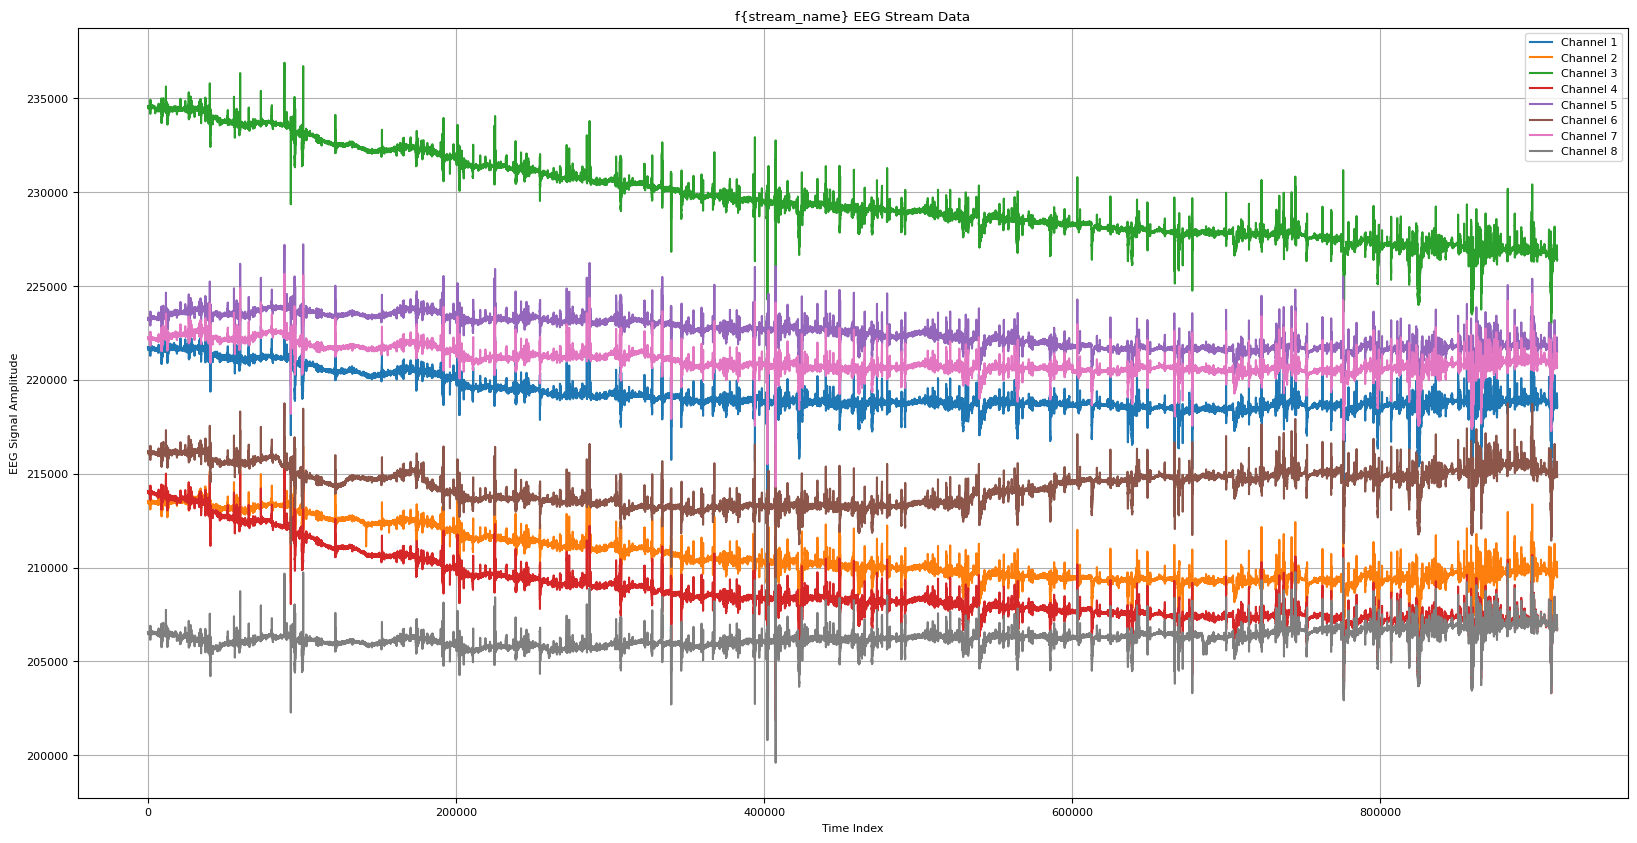

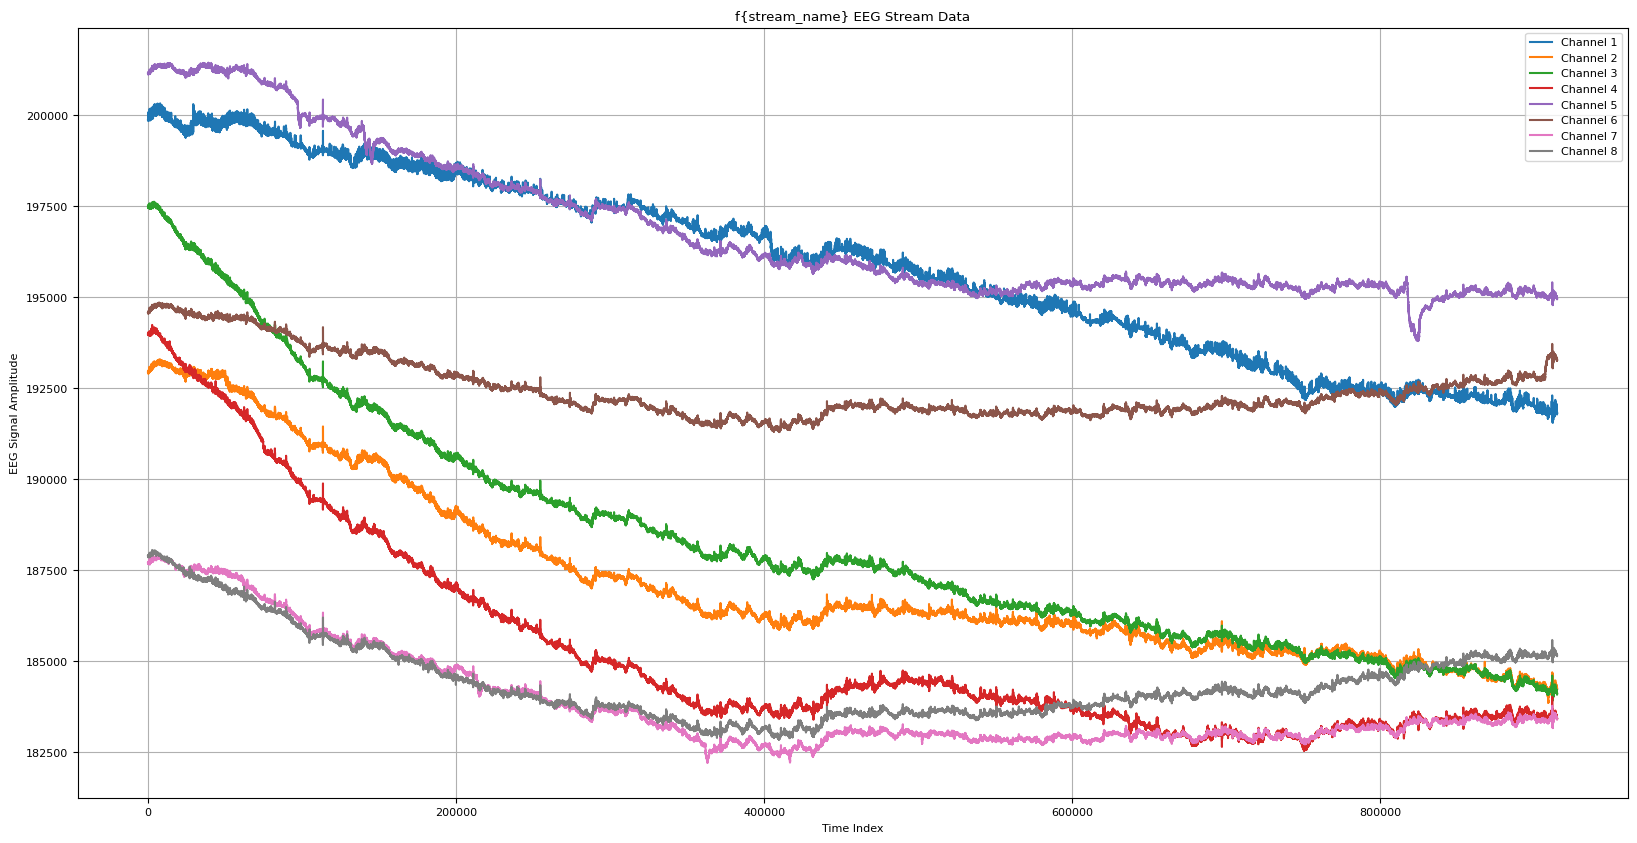

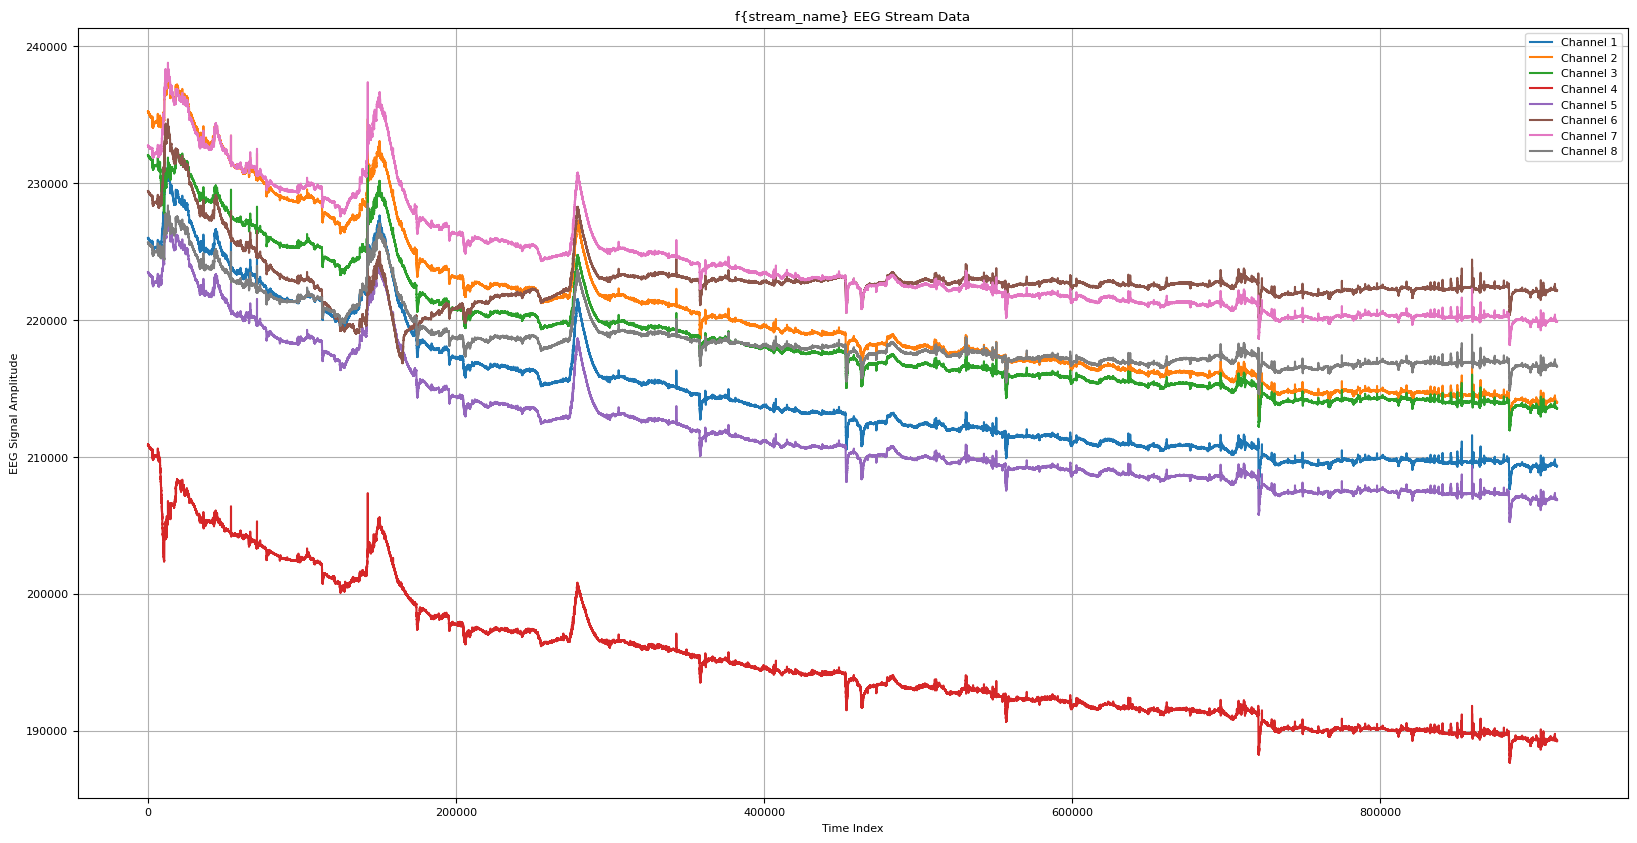

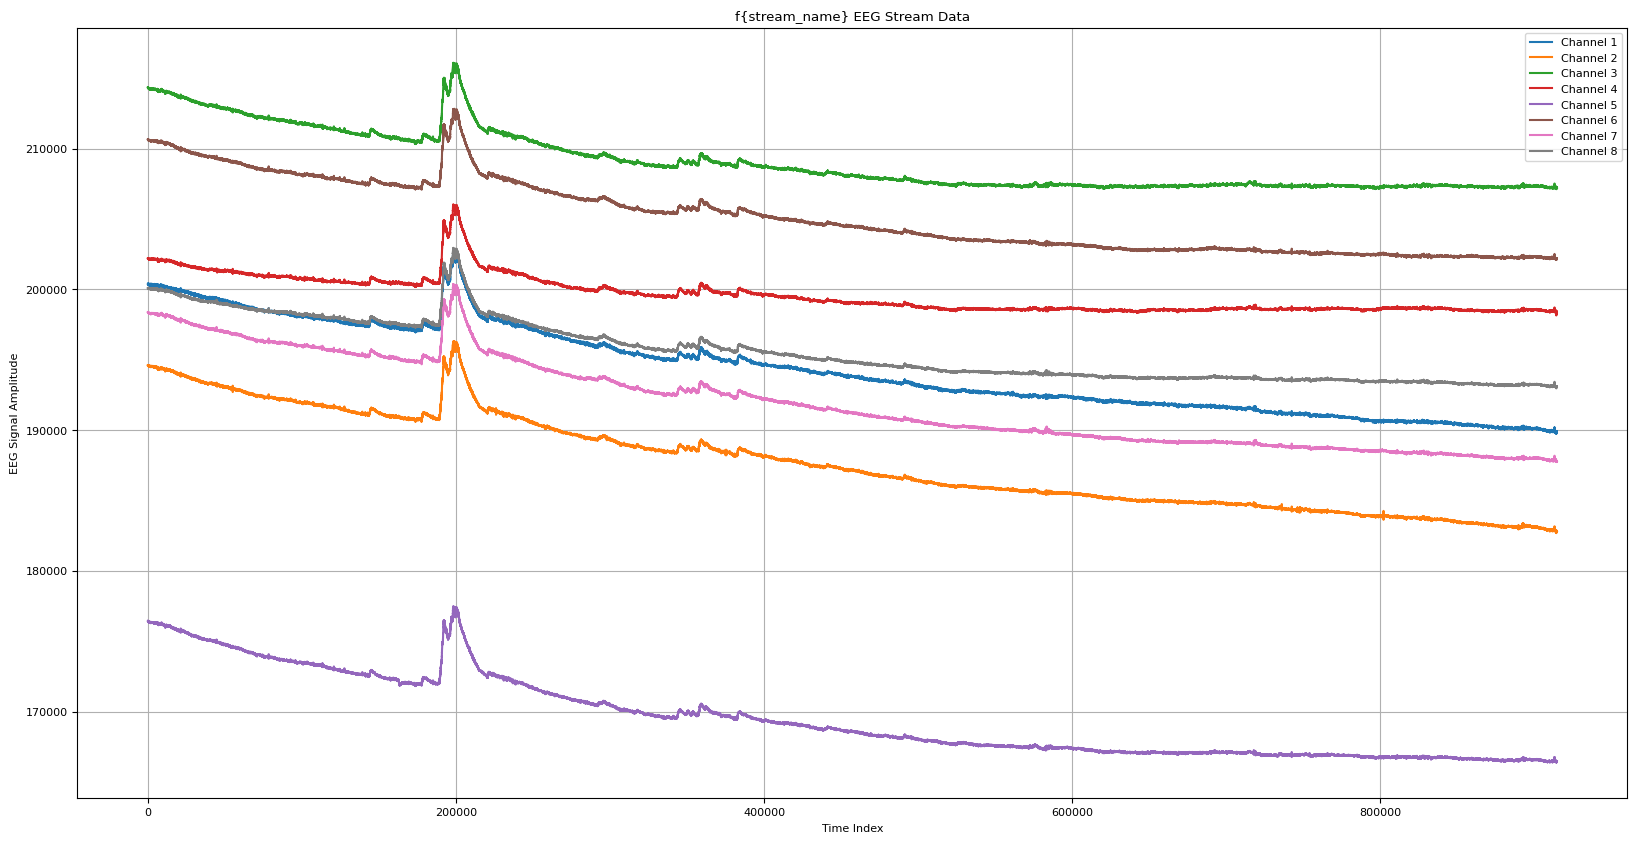

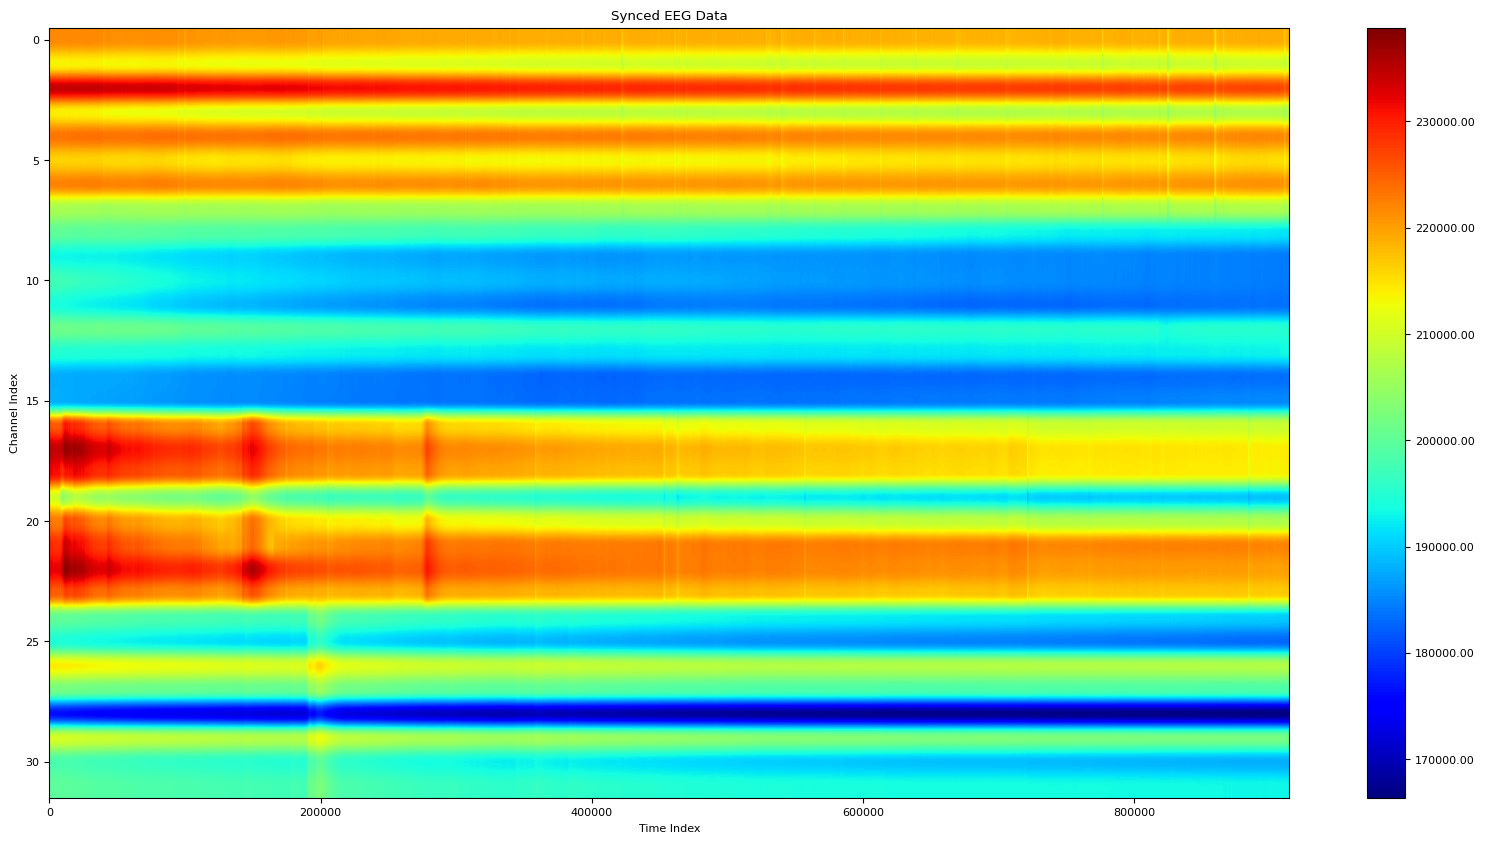

Min: 166371.0
Max: 238812.65625
Mean: 203940.3958171898
Standard Deviation: 15216.89674843184


In [25]:
import scipy.io

# Disable scientific notation in NumPy globally
np.set_printoptions(suppress=True)

# find the max length of time_series in all EEG streams to establish dimensions for synced EEG streams
max_length = 0

for stream_name in ["Unicorn_HCILab1", "Unicorn_HCILab2", "Unicorn_CSL_Laptop", "Unicorn_CSL_LabPC"]:
    max_length = max(max_length, len(streams[stream_name]["time_series"]))

# Create an np array to hold the synced EEG data with dimensions (max_length, 4 * 8)
synced_EEG_data = np.full((max_length, 4 * 8), np.nan)

# Fill in the synced EEG data
for j, stream_name in enumerate(["Unicorn_HCILab1", "Unicorn_HCILab2", "Unicorn_CSL_Laptop", "Unicorn_CSL_LabPC"]):
    EEG_stream = streams[stream_name]
    
    eeg_stream_data = np.full((len(EEG_stream["time_series"]), 8), np.nan)
    for time_index, eeg_data in enumerate(EEG_stream["time_series"]):
        synced_EEG_data[time_index, j * 8:(j + 1) * 8] = eeg_data[0:8]
        eeg_stream_data[time_index, :] = eeg_data[0:8]
    
    # Visualize the EEG stream data
    time_indices = range(eeg_stream_data.shape[0])
    
    plt.figure(figsize=(20, 10))
    
    # Plot each channel as a separate line
    for channel_idx in range(eeg_stream_data.shape[1]):
        plt.plot(time_indices, eeg_stream_data[:, channel_idx], label=f'Channel {channel_idx+1}')

    plt.title("f{stream_name} EEG Stream Data")
    plt.xlabel("Time Index")
    plt.ylabel("EEG Signal Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Download the EEG data as an .mat file
    scipy.io.savemat(f'{stream_name}.mat', {f'{stream_name}': eeg_stream_data})

# Visualize the synced EEG data
plt.figure(figsize=(20, 10))
plt.imshow(synced_EEG_data.T, aspect='auto', cmap='jet')
plt.colorbar(format='%.2f')  # Ensures color bar does not use scientific notation
plt.title("Synced EEG Data")
plt.xlabel("Time Index")
plt.ylabel("Channel Index")
plt.show()

print("Min:", np.nanmin(synced_EEG_data))
print("Max:", np.nanmax(synced_EEG_data))
print("Mean:", np.nanmean(synced_EEG_data))
print("Standard Deviation:", np.nanstd(synced_EEG_data))

# Download the EEG data as an .mat file
scipy.io.savemat('task_cutoff_EEG_data_3.mat', {'task_cutoff_EEG_data_3': synced_EEG_data})